# Summary of cortical connectivity maps for parcels 
Note that most functionality for the estimation and summarizing 
cortical connectivity models in in ```cortical_cerebellar_connectivity``` repro 

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import cortico_cereb_connectivity as ccc
import cortico_cereb_connectivity.scripts.script_summarize_weights as csw
import ProbabilisticParcellation.util as ut

conn_dir = ut.base_dir + '/Cerebellum/connectivity/maps/'


### Summarize the connectivity maps based on Cerebellar ROIs
This produces the summarizing parcel files (pscalar.nii) in ```conn_dir```. 


In [2]:
csw.make_weight_map('Demand','A8')
csw.make_weight_map('HCP','A-2')
csw.make_weight_map('IBC','A6')
csw.make_weight_map('MDTB','A8')
csw.make_weight_map('Somatotopic','A8')
csw.make_weight_map('WMFS','A8')
csw.make_weight_map('Nishimoto','A10')
csw.make_weight_map('Fusion','05')
csw.make_weight_map('Fusion','06')

/Users/callithrix/code/Python/Functional_Fusion/dataset.py:172: RuntimeWarning: Mean of empty slice
  parcel_data[..., i] = fcn(
/Users/callithrix/code/Python/Functional_Fusion/dataset.py:172: RuntimeWarning: Mean of empty slice
  parcel_data[..., i] = fcn(


### Summarize for yeo17 networks

In [3]:
T = csw.make_weight_table(dataset="Fusion",extension="06",cortical_roi="yeo17")

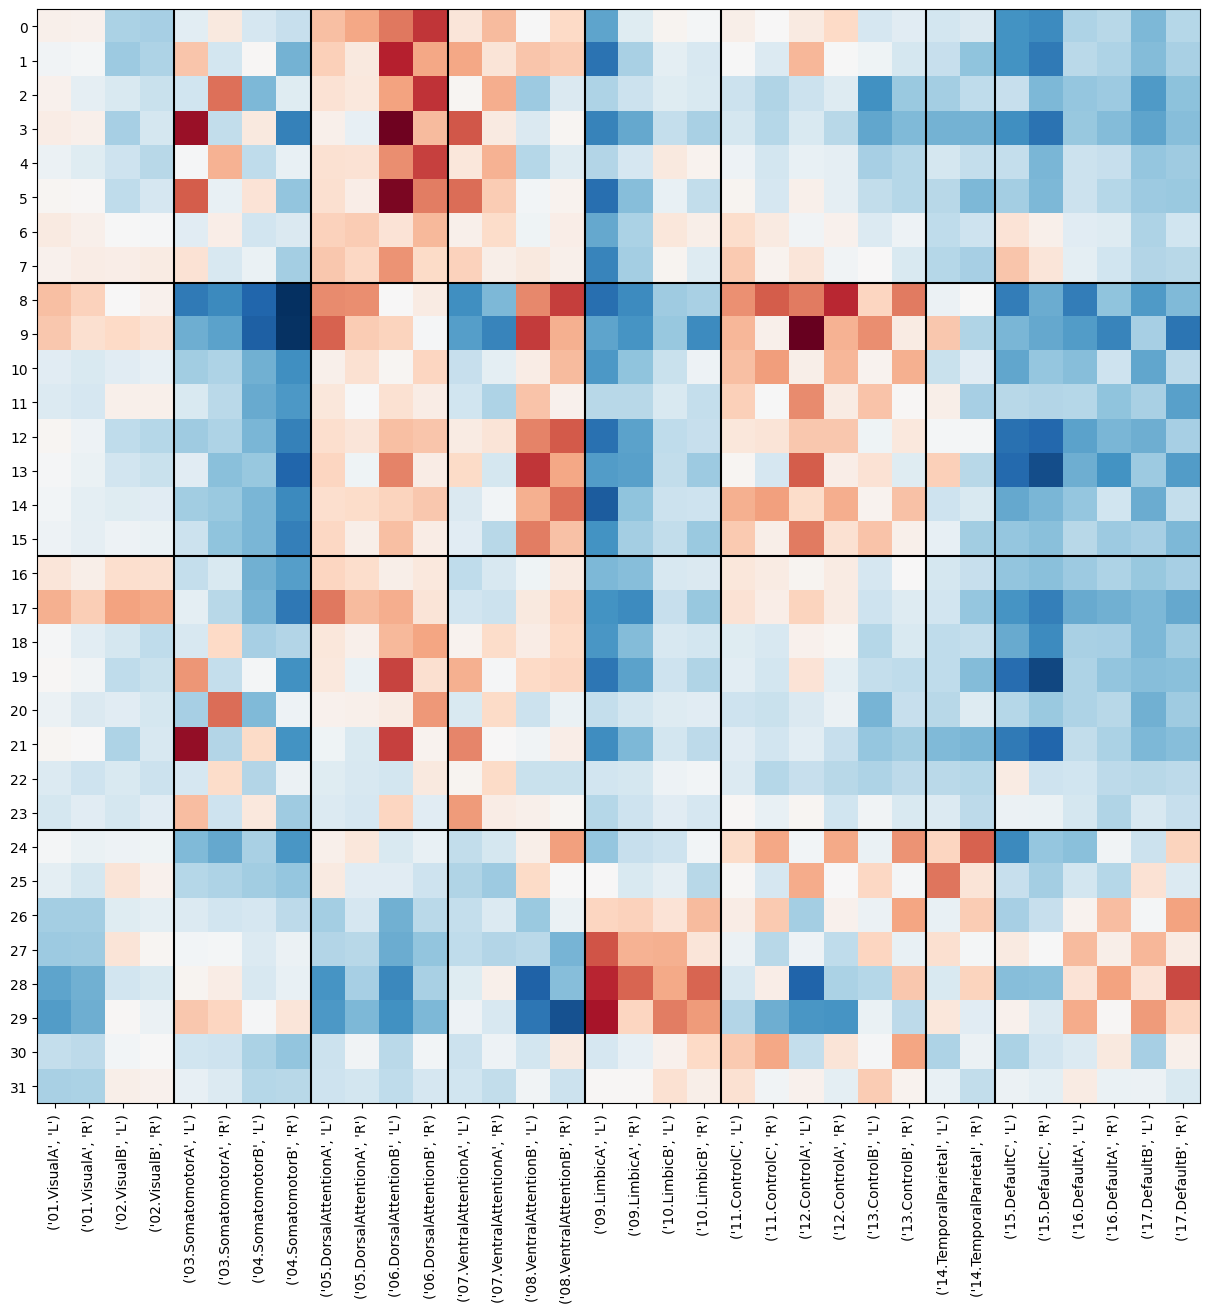

In [4]:
# Generate a table of weights split by hemisphere 
W = pd.pivot_table(T,index='cereb_region', columns=['fs_region','hemisphere'], values='weight')
plt.figure(figsize=(15,15))
plt.imshow(W.values,cmap='RdBu_r')
ax=plt.gca()
x1=ax.set_xticks(range(len(W.columns)))
ax.set_xticklabels(W.columns,rotation=90)
x2=ax.set_yticks(range(len(W.index)))
ax.set_yticklabels=W.index
hlines = [7.5,15.5,23.5]
vlines = [3.5,7.5,11.5,15.5,19.5,25.5,27.5]
for h in hlines:
    ax.axhline(h,color='k')
for v in vlines:
    ax.axvline(v,color='k')

if Path(ut.figure_dir).exists():
    plt.savefig(f'{ut.figure_dir}/cortical_connectivity_yeo_hem.pdf')
else:
    plt.savefig(f'{ut.base_dir}/lost_and_found/cortical_connectivity_yeo_hem.pdf')


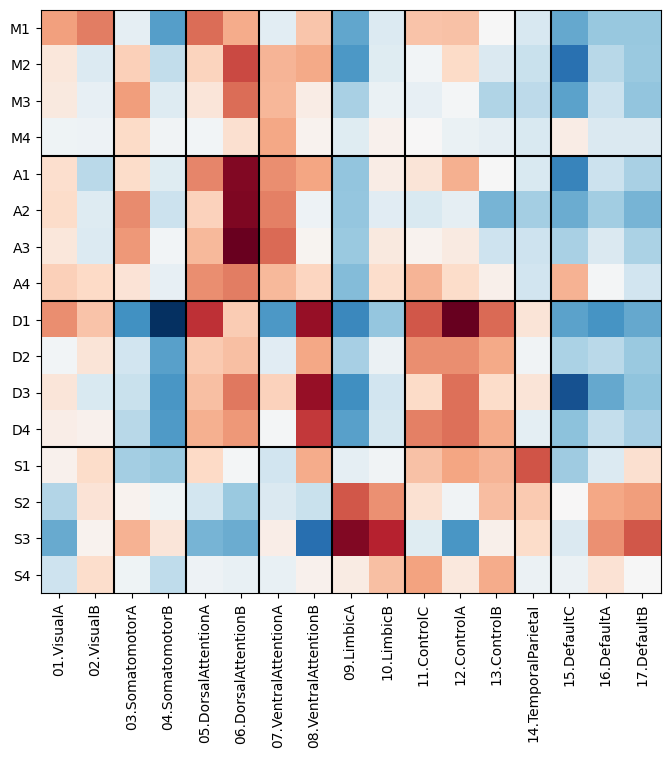

In [5]:
# Generate a table of weights
T['cereb_region2'] = [c[:2] for c in T.cereb_region]

W = pd.pivot_table(T,index='cereb_region2', columns='fs_region', values='weight',sort=False)
plt.figure(figsize=(8,8))
plt.imshow(W.values,cmap='RdBu_r')
ax=plt.gca()
x1=ax.set_xticks(range(len(W.columns)))
ax.set_xticklabels(labels=W.columns,rotation=90)
x2=ax.set_yticks(range(len(W.index)))
ax.set_yticklabels(labels=W.index)
hlines = [3.5,7.5,11.5]
vlines = [1.5,3.5,5.5,7.5,9.5,12.5,13.5]
for h in hlines:
    ax.axhline(h,color='k')
for v in vlines:
    ax.axvline(v,color='k')

if Path(ut.figure_dir).exists():
    plt.savefig(f'{ut.figure_dir}/cortical_connectivity_yeo.pdf')
else:
    plt.savefig(
        f'{ut.base_dir}/lost_and_found/cortical_connectivity_yeo.pdf')

